<h1 style="text-align:center">Optymalizacja zmiany biegów samochodu</h1>

## Wstęp

Skrzynia zmiany biegów jest mechanizmem, który przekłada obroty silnika na koła pojazdu, umożliwiając ruszanie, przyspieszanie oraz jazdę z różnymi prędkościami. Poprzez dobór odpowiednich przełożeń pozwala ona utrzymać silnik w korzystnym zakresie obrotów. Niższe biegi zapewniają większą siłę napędową przy niskich prędkościach, natomiast wyższe biegi umożliwiają ekonomiczną jazdę ze stałą prędkością.

## Cel projektu

Celem projektu jest opracowanie strategii optymalnej zmiany biegów, która zmniejszy zużycie paliwa oraz emisję tlenków azotu. Odpowiedni dobór momentu zmiany biegu pozwala utrzymać silnik w obszarze najwyższej sprawności, co przekłada się na bardziej ekonomiczną i ekologiczną eksploatację pojazdu.

## Opis modelu

### Ruch samochodu
Zakładamy że samochód porusza się ruchem prostoliniowym, na twardej nawierzchni, układ napędowy jak i silnik nie tracą na sprawnosci. Wtedy ruch samochodu można opisać wzorem z II zasady dynamiki Newtona
$$\sum F = ma$$
Które można przekształcić na<sup><a href=#zrodlo1>1</a></sup>
$$\frac{dv}{dt} = \frac{1}{m}(F_{x}-F_{D}-F_{R}-F_{G})$$

gdzie   
$F_{x}$ - siła pociągowa   
$F_{D}$ - opór areodynamiczny   
$F_{R}$ - opór toczenia  
$F_{G}$ - opór nachylenia terenu  

#### Postacie poszczególnych sił

##### Siła pociągowa<sup><a href=#zrodlo1>1</a></sup>
Siła generowana przez układ napędowy, przenoszona na podłoże, która umożliwia ruch obiektu wynosi. Wpływ bezwładności elementów wirujących pominięto, zakładając że ich wkład do dynamiki ruchu pojazdu jest niewielki w porównaniu z masą pojazdu.

$$F_{x} = \frac{T_{Eng}R_{n}\eta}{r}$$
gdzie  
$T_{Eng}$ - moment obrotowy silnika  
$R_{n}$ - stosunek przełożenia n  
$\eta$ - sprawność układu napędowego  
$r$ - promień opony

##### Opór areodynamiczny<sup><a href=#zrodlo1>1</a></sup>
Opór areodynamiczny działający na rzut powierzchni przodu pojazdu $A_{f}$ przy prędkości $v$ opisuje wzór

$$F_{D} = \frac{1}{2}\rho c_{W}Sv^2$$
gdzie  
$\rho$ - gęstość powietrza  
$c_{W}$ - współczynnik oporu pojazdu  
$S$ - powierzchnia czołowa pojazdu

##### Opór toczenia<sup><a href=#zrodlo1>1</a></sup>
Opór toczenia wyraża wzór

$$F_{R} = \mu mg\cos(\theta)$$

gdzie  
$\mu$ - współczynnik tarcia toczenia  
$\theta$ - kąt nachylenia terenu
##### Opór nachylenia terenu(Siła gradientu)<sup><a href=#zrodlo1>1</a></sup>

$$F_{G} = mg\sin(\theta)$$

#### Równanie ruchu

Zgodnie z wyprowadzeniem wszystkich sił działających na pojazd i podstaweniu ich do równania otrzymujemy
$$\frac{dv}{dt} = \frac{1}{m}(\frac{T_{Eng}R_{n}\eta}{r}-\frac{1}{2}\rho c_{W}Sv^2-\mu mg\cos(\theta)-mg\sin(\theta))$$

### Wyznaczenie punktu pracy silnika<sup><a href=#zrodlo1>1</a></sup>

Prędkość obrotowa wału korbowego silnika wynosi:

$$
N_{eng} = \frac{v \cdot i_g \cdot i_0}{2\pi \cdot r_{wheel}} \cdot 60
$$

Moment obrotowy generowany przez silnik, wynikający z równowagi sił oporów ruchu, można wyrazić jako:

$$
T_{eng} = \frac{R_{total} \cdot r_{wheel}}{i_g \cdot i_0 \cdot \eta_{trans}}
$$

gdzie:

- $i_g$ — przełożenie wybranego biegu  
- $i_0$ — przełożenie główne  
- $R_{total}$ — całkowita siła oporów ruchu  
- $\eta_{trans}$ — sprawność układu przeniesienia napędu  

### Model zużycia paliwa oparty na BSFC<sup><a href=#zrodlo1>1</a></sup>

Zamiast stałej sprawności $\eta$, stosuje się jednostkowe zużycie paliwa **BSFC**, które zależy od aktualnego punktu pracy silnika $(N_{eng}, T_{eng})$.

$$
\dot{m}_f(t) = \frac{BSFC(N_{eng}, T_{eng}) \cdot P_e(t)}{3.6 \times 10^6}
$$

gdzie:

- $BSFC(N, T)$ — jednostkowe zużycie paliwa [$\mathrm{g/kWh}$]  
- $P_e(t)$ — moc mechaniczna silnika [$\mathrm{W}$], obliczana jako  
$$
P_e = F_{\text{opory}} \cdot v
$$
- $3.6 \times 10^6$ — współczynnik konwersji z $\mathrm{kWh}$ na $\mathrm{Ws}$ (J)

### Model emisji NOx<sup><a href=#zrodlo1>1</a></sup>

Jednostkowa emisja tlenków azotu zależy od aktualnego punktu pracy silnika $(N_{eng}, T_{eng})$:

$$
\dot{m}_{NO_x}(t) = \frac{e_{NO_x}(N_{eng}, T_{eng}) \cdot P_e(t)}{3.6 \times 10^6}
$$

gdzie:

- $e_{NO_x}(N, T)$ — jednostkowa emisja NOx [$\mathrm{g/kWh}$]  
- $P_e(t)$ — moc mechaniczna silnika [$\mathrm{W}$]

### Funkcja celu optymalizacji<sup><a href=#zrodlo1>1</a></sup>

Celem algorytmu sterującego zmianą biegów jest wybór takiej sekwencji przełożeń $i_g(t)$, która minimalizuje koszt przejazdu:

$$
J = \int_0^{T} \left[ W \cdot \dot{m}_f(t) + (1 - W) \cdot \dot{m}_{NO_x}(t) \right] \, dt
$$

gdzie:

- $W \in [0,1]$ — współczynnik wagowy określający kompromis pomiędzy oszczędnością paliwa a redukcją emisji NOx


## Opis symulacji

Aby określić rzeczywistą sprawność silnika należy określić mapę BSFC(Brake specific fuel consumption), natomiast do wyznaczenia emisji NOx należy zastosować mapę jednostkowej emisji NOx. Mapę BSFC można wyznaczyć głównie z pomiarów i symulacji, lecz na cele tego projeku mapa BSFC została wyznaczona na podstawie tabeli<sup><a href=#zrodlo3>3</a></sup> która została wygenerowana przez symulację silnika spalinowego:

![BSFC map](BSFC-table.png)

Tabela przedstawia dyskretne wartości mapy BSFC dla poszczególnych obrotów i momentu obrotowego silnika, dlatego w symulacji poniżej została zastosowana interpolacja mapy w celu zminimalizowania skoków i bardziej realistycznego modelu.  

Do obliczania maksymalnego momentu silnika została użyta uproszczona charakterystyka silnika tzn. dla niskich obrotów moment silnika jest stały podobnie dla wysokich obrotów. Zostało to zastosowane aby slinik nie mógł generować nierealnie dużych momentów obrotowych przy dużych obrotach.  


Optymalne parametry dla metody Eulera: [15.6]
Minimalne zużycie paliwa [kg]: 189.85020168378958
Optymalne parametry dla metody Rungego-Kutty: [15.6]
Minimalne zużycie paliwa [kg]: 189.64058302011583


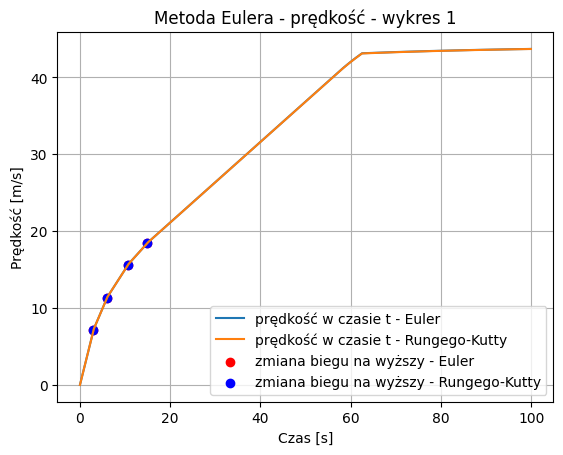

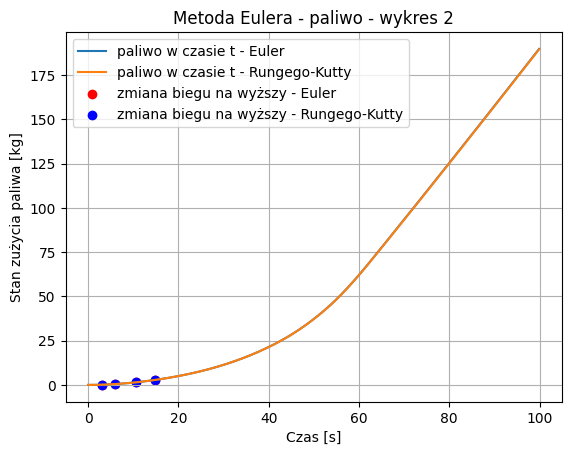

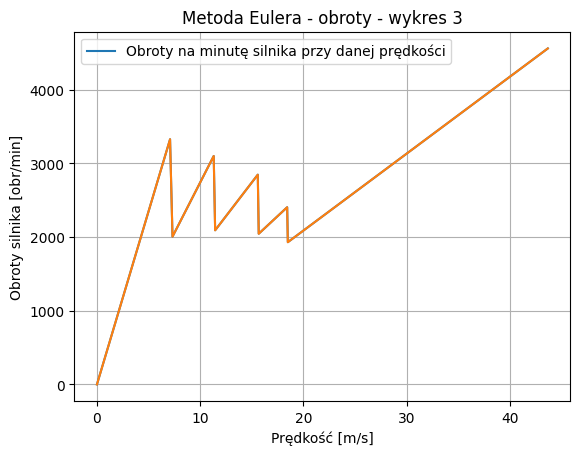

In [30]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator
from scipy.optimize import minimize

# --- Parametry ---
m = 1500.0          # masa [kg]
      
i_g = 4.1           # przełożenie główne
i_0 = [3.6, 2.1, 1.4, 1.0, 0.8] # przełożenie wybranego biegu
R=[]
for j in i_0:
    R.append(i_g*j)           
eta = 0.9           # sprawność [-]
r = 0.3             # promień koła [m]

rho = 1.225         # gęstość powietrza [kg/m^3]
c_W = 0.32          # współczynnik oporu
S = 2.2             # powierzchnia czołowa [m^2]

mu = 0.01           # współczynnik oporu toczenia
g = 9.81            # przyspieszenie ziemskie [m/s^2]
theta = 0.0         # kąt nachylenia drogi [rad]
N_eng_max = 6500    # maksymalne obroty
#-- mapa bsfc --
rpm = np.array([500, 1000, 1500, 2000, 2500, 3000,
                3500, 4000, 4500, 5000, 5500, 6000])

torque = np.array([15.6, 31.2, 46.8, 62.4, 78,
                   93.6, 109.2, 124.8, 140.4, 156, 171.6])

bsfc = np.array([
    [612.2, 442.7, 370.8, 331.2, 306.0, 313.2, 302.4, 324.0, 288.0, 288.0, 288.0],
    [612.0, 403.2, 336.6, 307.8, 284.4, 286.2, 282.6, 284.4, 288.0, 288.0, 288.0],
    [612.0, 406.8, 345.6, 306.0, 280.8, 262.8, 254.5, 246.6, 252.0, 288.0, 288.0],
    [594.0, 396.0, 334.8, 300.6, 275.4, 259.2, 244.8, 244.8, 248.4, 262.8, 288.0],
    [558.0, 381.6, 320.4, 284.4, 266.4, 246.6, 244.8, 244.8, 244.8, 255.6, 288.0],
    [522.0, 365.4, 311.4, 279.0, 262.8, 255.6, 248.4, 244.8, 244.8, 259.2, 288.0],
    [468.0, 340.2, 288.0, 280.8, 277.2, 267.5, 259.2, 248.4, 244.8, 262.8, 288.0],
    [522.0, 356.4, 317.5, 304.2, 282.6, 275.4, 262.8, 253.8, 262.8, 266.4, 288.0],
    [540.0, 392.4, 351.4, 316.8, 293.4, 279.0, 271.8, 270.0, 272.9, 275.4, 288.0],
    [684.0, 460.8, 378.0, 333.0, 306.0, 284.4, 283.3, 279.0, 283.0, 284.4, 288.0],
    [756.0, 511.2, 421.2, 365.4, 327.6, 295.2, 298.8, 295.2, 291.6, 289.8, 288.0],
    [756.0, 529.2, 432.0, 374.4, 334.8, 313.2, 298.8, 295.2, 291.6, 288.0, 288.0]
])


# --- Parametry symulacji ---
dt = 0.1           # krok czasowy [s]
t_max = 100.0        # czas symulacji [s]

# --- Warunki początkowe ---
v0 = 0.0            # prędkość początkowa [m/s]

# --- Wektory czasu i prędkości ---
t = np.arange(0, t_max, dt)



bsfc_interp = RegularGridInterpolator(
    (rpm, torque),
    bsfc,
    bounds_error=False,
    fill_value=None
)

def T_max(N):
    if N < 1000:
        return 120
    elif N < 3000:
        return 120 + (N-1000)*(80/2000) 
    elif N < 4500:
        return 200 - (N-3000)*(40/1500)  
    else:
        return 100
    
def bsfc_map(N_eng, T_eng):
    N_eng = np.clip(N_eng, rpm.min(), rpm.max())
    T_eng = np.clip(T_eng, torque.min(), torque.max())
    return float(bsfc_interp((N_eng, T_eng)))

def R_total(v):
    F_d = 0.5 * rho * c_W * S * v**2
    F_r = mu * m * g * np.cos(theta)
    F_g = m * g * np.sin(theta)
    return F_d + F_r + F_g

def dvdt_fun(v, T_eng, n):
    return (1/m) * ((T_eng * R[n] * eta) / r - R_total(v))

def dmdt_fun(v, N_eng, T_eng):
    return (bsfc_map(N_eng, T_eng) * R_total(v) * v) / (3.6e6)

def should_shift(v, n, dmdt, T_eng_min):
    if n >= len(R)-1:
        return False
    N_next = v/(2*np.pi*r)*R[n+1]*60
    T_req_next = (R_total(v)*r)/(R[n+1]*eta)
    T_next = max(min(T_max(N_next), T_req_next + 80), T_eng_min)
    dmdt_next = dmdt_fun(v, N_next, T_next)

    return dmdt_next < dmdt


def rk4_m(fuel, v, N_eng, T_eng, dt):
    dm = dmdt_fun(v, N_eng, T_eng)
    return fuel + dm * dt

def rk4_v(v, T_eng, n, dt):
    k1 = dvdt_fun(v, T_eng, n)
    k2 = dvdt_fun(v + 0.5*dt*k1, T_eng, n)
    k3 = dvdt_fun(v + 0.5*dt*k2, T_eng, n)
    k4 = dvdt_fun(v + dt*k3, T_eng, n)
    return v + (dt/6)*(k1 + 2*k2 + 2*k3 + k4)

def fuel_opt_euler(params):

    list_v = []
    list_t = []
    list_f = []

    T_eng_min = params[0]

    v_euler = np.zeros(len(t))
    v_euler[0] = v0

    fuel_euler = np.zeros(len(t))
    fuel_euler[0] = 0

    n_euler = 0

    N_list = np.zeros(len(t)) 

    for i in range(len(t) - 1):

        N_eng_e = v_euler[i]/(2*math.pi*r)*R[n_euler]*60
        if N_eng_e > N_eng_max and n_euler<len(R) - 1:
            n_euler+=1
            N_eng_e = v_euler[i]/(2*math.pi*r)*R[n_euler]*60
        T_req = (R_total(v_euler[i])*r)/(R[n_euler]*eta)
        T_eng_e = min(T_max(N_eng_e), T_req + 80)
        T_eng_e = max(T_eng_e, T_eng_min)

        N_list[i] = N_eng_e

        dvdt_euler = dvdt_fun(v_euler[i], T_eng_e, n_euler)
        v_euler[i+1] = v_euler[i] + dvdt_euler * dt
        dmdt_euler = dmdt_fun(v_euler[i], N_eng_e, T_eng_e)
        if should_shift(v_euler[i], n_euler, dmdt_euler, T_eng_min):
            n_euler += 1
            list_t.append(t[i])
            list_v.append(v_euler[i])
            list_f.append(fuel_euler[i])
        fuel_euler[i+1] = fuel_euler[i] + dmdt_euler * dt
    N_list[-1] = N_list[-2]
    return fuel_euler[-1], v_euler, list_t, list_v, fuel_euler, list_f, N_list
def fuel_opt_kutt(params):

    list_v = []
    list_t = []
    list_f = []

    T_eng_min = params[0]

    v_kutt = np.zeros(len(t))
    v_kutt[0] = v0

    fuel_kutt = np.zeros(len(t))
    fuel_kutt[0] = 0

    n_kutt = 0

    N_list = np.zeros(len(t)) 

    for i in range(len(t) - 1):

        N_eng_e = v_kutt[i]/(2*math.pi*r)*R[n_kutt]*60
        if N_eng_e > N_eng_max and n_kutt<len(R) - 1:
            n_kutt+=1
            N_eng_e = v_kutt[i]/(2*math.pi*r)*R[n_kutt]*60
        T_req = (R_total(v_kutt[i])*r)/(R[n_kutt]*eta)
        T_eng_e = min(T_max(N_eng_e), T_req + 80)
        T_eng_e = max(T_eng_e, T_eng_min)

        N_list[i] = N_eng_e

        dvdt = dvdt_fun(v_kutt[i], T_eng_e, n_kutt)
        v_kutt[i+1] = rk4_v(v_kutt[i], T_eng_e, n_kutt, dt)
        dmdt = dmdt_fun(v_kutt[i], N_eng_e, T_eng_e)
        if should_shift(v_kutt[i], n_kutt, dmdt, T_eng_min):
            n_kutt += 1
            list_t.append(t[i])
            list_v.append(v_kutt[i])
            list_f.append(fuel_kutt[i])
        fuel_kutt[i+1] = rk4_m(fuel_kutt[i], v_kutt[i], N_eng_e, T_eng_e, dt)
    N_list[-1] = N_list[-2]
    return fuel_kutt[-1], v_kutt, list_t, list_v, fuel_kutt, list_f, N_list

x0 = [15.6]
bounds = [(10, 50)]  
def minimali_value_euler(min):
    fuel, *_ = fuel_opt_euler(min)
    return fuel

result = minimize(minimali_value_euler, x0, bounds=bounds, method='L-BFGS-B')

print("Optymalne parametry dla metody Eulera:", result.x)
print("Minimalne zużycie paliwa [kg]:", result.fun)

optimal = fuel_opt_euler(result.x)


def minimali_value_kutt(min):
    fuel, *_ = fuel_opt_kutt(min)
    return fuel

result = minimize(minimali_value_kutt, x0, bounds=bounds, method='L-BFGS-B')

print("Optymalne parametry dla metody Rungego-Kutty:", result.x)
print("Minimalne zużycie paliwa [kg]:", result.fun)

optimal_kutt = fuel_opt_kutt(result.x)
# --- Wykresy ---
plt.plot(t, optimal[1], label='prędkość w czasie t - Euler')
plt.plot(t, optimal_kutt[1], label='prędkość w czasie t - Rungego-Kutty')
plt.scatter(optimal[2],optimal[3], c='red',label='zmiana biegu na wyższy - Euler')
plt.scatter(optimal_kutt[2],optimal_kutt[3], c='blue',label='zmiana biegu na wyższy - Rungego-Kutty')
plt.legend()
plt.xlabel("Czas [s]")
plt.ylabel("Prędkość [m/s]")
plt.title("Metoda Eulera - prędkość - wykres 1")
plt.grid()
plt.show()

plt.plot(t, optimal[4], label='paliwo w czasie t - Euler')
plt.plot(t, optimal_kutt[4], label='paliwo w czasie t - Rungego-Kutty')
plt.scatter(optimal[2],optimal[5], c='red',label='zmiana biegu na wyższy - Euler')
plt.scatter(optimal_kutt[2],optimal_kutt[5], c='blue',label='zmiana biegu na wyższy - Rungego-Kutty')

plt.legend()
plt.xlabel("Czas [s]")
plt.ylabel("Stan zużycia paliwa [kg]")
plt.title("Metoda Eulera - paliwo - wykres 2")
plt.grid()
plt.show()

plt.plot(optimal[1], optimal[6])
plt.plot(optimal_kutt[1], optimal_kutt[6])
plt.legend(['Obroty na minutę silnika przy danej prędkości'])
plt.ylabel("Obroty silnika [obr/min]")
plt.xlabel("Prędkość [m/s]")
plt.title("Metoda Eulera - obroty - wykres 3")
plt.grid()
plt.show()

### Notacja <div id="def"></div>
$t$ - czas($s$)  
$m$ - masa pojazdu($kg$)  
$v$ - prędkość pojazdu($\frac{m}{s}$)  
$a$ - przyspieszenie pojazdu($\frac{m}{s^2}$)  
$F_{x}$ - siła pociągowa($N$)  
$F_{D}$ - opór areodynamiczny($N$)  
$F_{R}$ - opór toczenia($N$)  
$F_{G}$ - opór nachylenia terenu($N$)  
$T_{Eng}$ - moment obrotowy silnika($\frac{N}{m}$)  
$R_{n}$ - stosunek przełożenia n  
$\eta$ - sprawność ukłądu napędowego  
$r$ - promień opony($m$)  
$\rho$ - gęstość powietrza  
$c_{W}$ - współczynnik oporu pojazdu  
$S$ - powierzchnia czołowa pojazdu($m^2$)  
$g$ - przyspieszenie ziemskie  
$\theta$ - kąt nachylenia terenu

## Bibliografia

1. Oglieve CJ, Mohammadpour M, Rahnejat H. Optimisation of the vehicle transmission and the gear-shifting strategy for the minimum fuel consumption and the minimum nitrogen oxide emissions. Proceedings of the Institution of Mechanical Engineers, Part D: Journal of Automobile Engineering. 2017;231(7):883-899. doi:10.1177/0954407017702985<div id="zrodlo1"></div>
2. Heywood, John B., Internal Combustion Engine Fundamentals: https://thuvienso.tnut.edu.vn/handle/123456789/1198<div id="zrodlo2"></div>
3. https://x-engineer.org/brake-specific-fuel-consumption-bsfc/<div id="zrodlo3"></div>
  